<a href="https://colab.research.google.com/github/cate1285/Projects/blob/main/PROYECTO_1_INSIDE_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manejo de datos CSV ficheros 

In [ ]:
from urllib import request 
from urllib.error import URLError

try:
  f=request.urlopen('https://raw.githubusercontent.com/cate1285/Test-GitHub/main/Barcelona1.csv')
except:
  print("La URL no existe")
else:
  lineas=f.read().decode("latin-1").splitlines()
  columnas=lineas[0].split(";")
  seleccion=["name","host_id","city","property_type","accommodates","price"]
  traduction={"name":"nombre","host_id":"administrador_id","city":"ciudad","property_type":"tipo","accommodates":"acomodaciones","price":"precio"}
  alojamientos= []
  for linea in lineas[1:]:
    alojamiento= {}
    campos= linea.split(";")
    for i in range(len(columnas)):
      if columnas[i] in seleccion:
         alojamiento[traduction[columnas[i]]] = campos[i]          
    alojamientos.append(alojamiento)
for i in alojamientos:
  print(i)

  

{'nombre': 'Rooftop terrace room with ensuite bathroom, Airc.', 'administrador_id': '13660', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '2', 'precio': '$70.00'}
{'nombre': 'Bright and airy room', 'administrador_id': '83531', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '1', 'precio': '$17.00'}
{'nombre': 'Gran Via Studio Madrid', 'administrador_id': '101471', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '3', 'precio': '$80.00'}
{'nombre': '"Select the Madrid more ""cool""."', 'administrador_id': '101653', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '4', 'precio': '$115.00'}
{'nombre': 'Single Room whith private Bathroom', 'administrador_id': '114340', 'ciudad': 'Madrid', 'tipo': 'House', 'acomodaciones': '1', 'precio': '$25.00'}
{'nombre': 'Great Vacational Apartments', 'administrador_id': '130907', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '2', 'precio': '$65.00'}
{'nombre': 'Beautiful loft in Madrid Center', 'admi

Crear una función que reciba la lista de alojamientos y devuelva el número de alojamientos para cada tipo de habitacion.

In [ ]:
def alojamiento_1(alojamientos):
  alojamiento_1={}
  for alojamiento in alojamientos:
    if alojamiento["tipo"] in alojamiento_1.keys():
      alojamiento_1[alojamiento["tipo"]]+=1
    else:
      alojamiento_1[alojamiento["tipo"]]=1
  return alojamiento_1
print(alojamiento_1(alojamientos))



{'Apartment': 6, 'House': 1, 'Loft': 1}


Crear una función que reciba la lista de alojamientos y un número de ocupantes y devuelva la lista de alojamientos con un número de plazas mayor o igual al que se indica.

In [ ]:
def alojamientos_2(alojamientos, plazas):
  return[alojamiento for  alojamiento in alojamientos if int(alojamiento["acomodaciones"])> plazas]
 
print(alojamientos_2(alojamientos,2))

[{'nombre': 'Gran Via Studio Madrid', 'Calificacion': '100%', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '3'}, {'nombre': '"Select the Madrid more ""cool""."', 'Calificacion': '100%', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '4'}, {'nombre': 'Holiday Apartment Madrid Center', 'Calificacion': '100%', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '3'}]


Crear una función que reciba la lista de alojamientos un distrito, y devuelva los 10 alojamientos más baratos del distrito.

In [ ]:
def alojamiento_3(alojamientos,tipo,n):

  alojamiento_4=[alojamiento for alojamiento in alojamientos if alojamiento["tipo"]==tipo]
  def ordenamos(dict):return (dict["precio"][1:])
  rankin_1=sorted(alojamiento_4, key = ordenamos)
  return rankin_1[:n]
top=alojamiento_3(alojamientos,"Apartment",3)
print(top)

[{'nombre': '"Select the Madrid more ""cool""."', 'Calificacion': '100%', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '4', 'precio': '$115.00'}, {'nombre': 'Bright and airy room', 'Calificacion': 'N/A', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '1', 'precio': '$17.00'}, {'nombre': 'Great Vacational Apartments', 'Calificacion': '100%', 'ciudad': 'Madrid', 'tipo': 'Apartment', 'acomodaciones': '2', 'precio': '$65.00'}]


Crear una función que reciba la lista de alojamientos y devuelva un diccionario con los anfitriones y el número de alojamientos que posee cada uno.

In [ ]:
def alojamiento_1(alojamientos):
  alojamiento_1={}
  for alojamiento in alojamientos:
    if alojamiento["administrador_id"] in alojamiento_1.keys():
      alojamiento_1[alojamiento["administrador_id"]]+=1
    else:
      alojamiento_1[alojamiento["administrador_id"]]=1
  return alojamiento_1
print(alojamiento_1(alojamientos))


{'13660': 1, '83531': 1, '101471': 1, '101653': 1, '114340': 1, '130907': 2, '132883': 1}


USO DE PANDAS

Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).

In [108]:
import pandas as pd

try:
  alojamient = pd.read_csv("Final1.csv",sep=";", encoding="latin-1")
except URLError:
  print("La url non existe")
else:
  alojamient.rename(columns = {"host_name":"administrador","cleaning_fee":"gastos_limpieza","minimum_nights":"noches_minimas", "review_scores_rating":"puntuacion","listing_url":"url","neighbourhood":"barrio"},inplace=True)
  alojamient=alojamient[["id","accommodates","price","property_type","administrador","url","barrio","monthly_price","noches_minimas","puntuacion","gastos_limpieza"]]
  alojamient = alojamient.dropna()
  alojamient["price"]=alojamient.price.str.replace(","," ").str[1:].astype("float")
  alojamient["gastos_limpieza"] = alojamient.gastos_limpieza.str[1:].astype("float")
  alojamient["precio_persona"] = (alojamient.price * alojamient.noches_minimas + alojamient.gastos_limpieza) / (alojamient.noches_minimas + alojamient.accommodates)
alojamient

  

,id,accommodates,price,property_type,administrador,url,barrio,monthly_price,noches_minimas,puntuacion,gastos_limpieza,precio_persona
0,6369.0,2.0,70.0,Apartment,Simon,https://www.airbnb.com/rooms/6369,Chamartín,$950.00,1.0,98.0,5.0,25.00
2,24805.0,3.0,80.0,Apartment,Iraido,https://www.airbnb.com/rooms/24805,Malasaña,"$1,200.00",5.0,100.0,30.0,53.75


Crear una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en esos distritos y el porcentaje de alojamientos de ese tipo.

In [82]:
def fun (alojamient,distritos):
  return alojamient[alojamient.barrio.isin(distritos)].property_type.value_counts(normalize=True)*100
print(fun(alojamient,["Chamartín","Malasaña"]))


Apartment    100.0
Name: property_type, dtype: float64


Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distritos, ordenado de más a menos alojamientos.

In [84]:
def fun (alojamient,distritos):
  return alojamient[alojamient.barrio.isin(distritos)].administrador.value_counts().sort_values(ascending=False)
print(fun(alojamient,("Chamartín","Malasaña")))



Iraido    1
Simon     1
Name: administrador, dtype: int64


9. Crear una función que devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.

In [85]:
def x(alojamient):
  return alojamient.groupby("barrio").administrador.value_counts().unstack(level="barrio").mean()
print(x(alojamient))

barrio
Chamartín    1.0
Malasaña     1.0
dtype: float64


10. Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

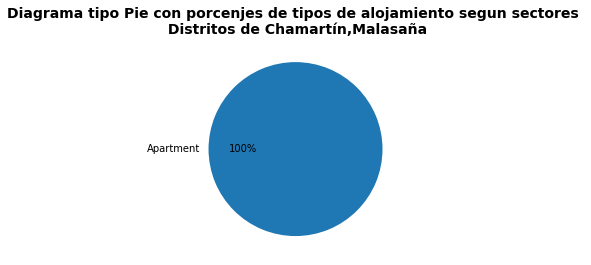

In [86]:
import matplotlib.pyplot as plt

def x(alojamient,distritos):
  fig, ax = plt.subplots()
  alojamient[alojamient.barrio.isin(distritos)].property_type.value_counts(normalize=True).plot(kind="pie", autopct="%1.0f%%", ax = ax)
  ax.set_title("Diagrama tipo Pie con porcenjes de tipos de alojamiento segun sectores \n Distritos de "+ ",".join(distritos),loc="center",fontdict = {"fontsize":14,"fontweight":"bold"})
  ax.set_ylabel("")
  plt.show()
  return

x(alojamient,["Chamartín","Malasaña"],)



11. Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.

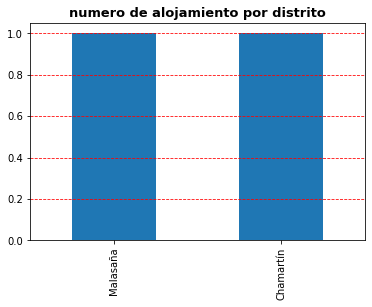

In [87]:
def diagrama_barras(alojamient):
  fig,ax=plt.subplots()
  alojamient.barrio.value_counts().plot(kind="bar")
  ax.set_title("numero de alojamiento por distrito",loc="center",fontdict={"fontsize":13,"fontweight":"bold"})
  ax.grid(axis="y",color="red",linestyle="dashed")

  plt.show()
  return
diagrama_barras(alojamient)

12. Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

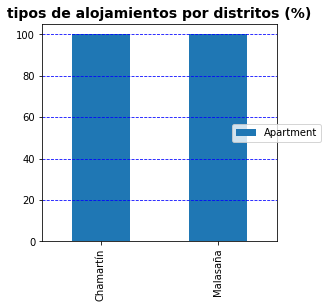

In [91]:
def alojamiento_distritos (alojamient):
  fig,ax=plt.subplots()
  (alojamient.groupby("barrio").property_type.value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, ax=ax)
  ax.set_title("tipos de alojamientos por distritos (%)",loc="center",fontdict= {"fontsize":14,"fontweight":"bold"})
  ax.set_xlabel("")
  ax.grid(axis="y",color="blue",linestyle="dashed")
  box=ax.get_position()
  ax.set_position([box.x0, box.y0,box.width*0.7,box.height])
  plt.legend(loc="center",bbox_to_anchor=(1.0,0.5))
  plt.show()
  return
alojamiento_distritos(alojamient)

Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión en esos distritos.

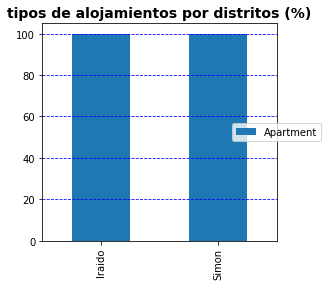

In [96]:
def distritos_anfitrion(alojamient,barrio,type_property):

  fig,ax=plt.subplots()
  (alojamient.groupby("administrador").property_type.value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, ax=ax)
  ax.set_title("tipos de alojamientos por distritos (%)",loc="center",fontdict= {"fontsize":14,"fontweight":"bold"})
  ax.set_xlabel("")
  ax.grid(axis="y",color="blue",linestyle="dashed")
  box=ax.get_position()
  ax.set_position([box.x0, box.y0,box.width*0.7,box.height])
  plt.legend(loc="center",bbox_to_anchor=(1.0,0.5))
  plt.show()
  return
distritos_anfitrion(alojamient,["Centro","Sol"],["Apartment","Loft"])

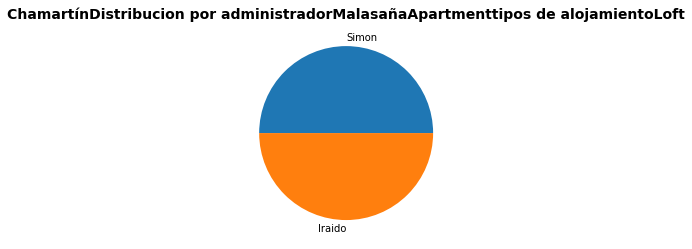

In [97]:
def piedistritos_anfitrion(alojamient,barrios,tipos):

  fix,ax=plt.subplots()
  alojamient_filtrados=alojamient[alojamient.barrio.isin(barrios) & alojamient.property_type.isin(tipos)]
  alojamient_filtrados.administrador.value_counts(normalize=True).plot(kind="pie",ax=ax)
  ax.set_title("Distribucion por administrador" .join(barrios)+"tipos de alojamiento".join(tipos),loc="center",fontdict= {"fontsize":14,"fontweight":"bold"})
  ax.set_ylabel("")
  plt.show()
  return
piedistritos_anfitrion(alojamient,["Chamartín","Malasaña"],["Apartment","Loft"])


15. Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el precio por por noche y persona y la puntuación en esos distritos.




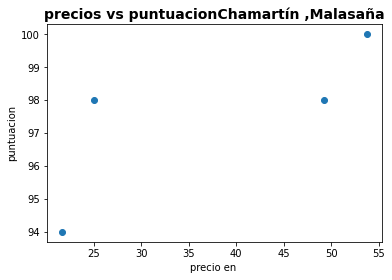

In [107]:
def diagrama_dispersion(alojamient,distritos):
  fig,ax=plt.subplots()
  alojamients_filtrados=alojamient[alojamient.barrio.isin(distritos)]
  alojamient["precio_persona"]=(alojamient.price*alojamient.noches_minimas+alojamient.gastos_limpieza)/(alojamient.noches_minimas+alojamient.accommodates)
  ax.scatter(alojamient["precio_persona"],alojamient["puntuacion"])
  ax.set_title("precios vs puntuacion"+" ,".join(distritos),loc="center",fontdict={"fontsize":14,"fontweight":"bold"})
  ax.set_xlabel("precio en ")
  ax.set_ylabel("puntuacion")
  plt.show()
  return

diagrama_dispersion (alojamient,["Chamartín","Malasaña"])